In [ ]:
# Churn_Modelling.csv

In [ ]:
import numpy as np  # I imported numpy to perform mathematical operatioins on multi-dimensional array
import pandas as pd  # pandas for structuring, manipulation and analysis of data

In [ ]:
df=pd.read_csv('Churn_Modelling.csv')
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [ ]:
df.info()
# Columns which I can drop : RowNumber,CustomerId,Surname

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)


In [ ]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
df['Geography']=df['Geography'].replace(
    {'France':0,'Spain':1,'Germany':2},
)

<ipython-input-9-d0604a95d536>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Geography']=df['Geography'].replace(


In [ ]:
df['Gender']=df['Gender'].replace({'Male':0,'Female':1})

<ipython-input-10-e3da044756d2>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender']=df['Gender'].replace({'Male':0,'Female':1})


In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
from sklearn.model_selection import train_test_split
features=df.drop('Exited',axis=1)
target=df['Exited']
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.2,random_state=1,stratify=target)

In [ ]:
from sklearn.preprocessing import StandardScaler # Converts data to have zero mean and unit variance (mean = 0, standard deviation = 1)
ss=StandardScaler()
xtrain_s=ss.fit_transform(xtrain)
xtest_s=ss.transform(xtest)

In [ ]:
xtrain

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
4256,596,1,1,76,9,134208.25,1,1,1,13455.43
9151,614,0,0,49,1,0.00,2,1,0,192440.54
696,445,1,0,62,1,64119.38,1,1,1,76569.64
4898,544,0,1,40,7,0.00,1,0,1,161076.92
6427,746,0,0,37,2,0.00,2,1,0,143194.05
...,...,...,...,...,...,...,...,...,...,...
5090,474,0,1,30,9,0.00,2,0,0,63158.22
9358,837,0,1,29,9,0.00,2,1,1,41866.26
9583,602,1,0,34,8,98382.72,1,1,0,39542.00
451,850,0,0,40,9,0.00,2,0,1,119232.33


In [ ]:
print(xtrain_s)
print(xtrain_s.shape)

[[-0.55659995  0.30156623  1.0952694  ...  0.6493972   0.96728484
  -1.50521554]
 [-0.37047162 -0.90349364 -0.91301738 ...  0.6493972  -1.03382164
   1.61465549]
 [-2.11800977  0.30156623 -0.91301738 ...  0.6493972   0.96728484
  -0.40507824]
 ...
 [-0.49455717  0.30156623 -0.91301738 ...  0.6493972  -1.03382164
  -1.05050322]
 [ 2.0698775  -0.90349364 -0.91301738 ... -1.53988961  0.96728484
   0.33857072]
 [ 0.78766016 -0.90349364 -0.91301738 ... -1.53988961 -1.03382164
  -0.03047309]]
(8000, 10)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
xtrain_s.shape

(8000, 10)

In [ ]:
ytrain.shape

(8000,)

In [ ]:
xtest.shape

(2000, 10)

In [ ]:
ytest.shape

(2000,)

In [ ]:
xtest_s.shape

(2000, 10)

In [ ]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=10))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Total number of parameters = 121+132+12 = 265
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             121 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 265 (1.04 KB)

 Trainable params: 265 (1.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])   # loss = sparse_categorical_crossentropy for multiclass classification
                                                                                # for regression loss = mse

In [ ]:
history=model.fit(xtrain_s,ytrain,batch_size=10,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7034 - loss: 0.5566 - val_accuracy: 0.8006 - val_loss: 0.4362
Epoch 2/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8210 - loss: 0.4102 - val_accuracy: 0.8181 - val_loss: 0.4201
Epoch 3/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8321 - loss: 0.4041 - val_accuracy: 0.8219 - val_loss: 0.4043
Epoch 4/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8349 - loss: 0.3864 - val_accuracy: 0.8388 - val_loss: 0.3861
Epoch 5/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8450 - loss: 0.3751 - val_accuracy: 0.8406 - val_loss: 0.3742
Epoch 6/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8556 - loss: 0.3518 - val_accuracy: 0.8444 - val_loss: 0.3637
Epoch 7/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8564 - loss: 0.3506 - val_accuracy: 0.8512 - val_loss: 0.3587
Epoch 8/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8583 - loss: 0.3467 - val_accuracy: 0.

In [ ]:
ypred=model.predict(xtest_s)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [ ]:
ypred

array([[0.0536744 ],
       [0.09252449],
       [0.1847327 ],
       ...,
       [0.37977928],
       [0.01885388],
       [0.18480828]], dtype=float32)

In [ ]:
ypred=np.where(ypred>0.5,1,0).reshape(-1)  #reshape(-1) means convert to a single-dimensional array, irrespective of the original shape.
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(ytest,ypred)

0.8555

In [ ]:
confusion_matrix(ytest,ypred)

array([[1515,   78],
       [ 211,  196]])

# **11th March 2025**

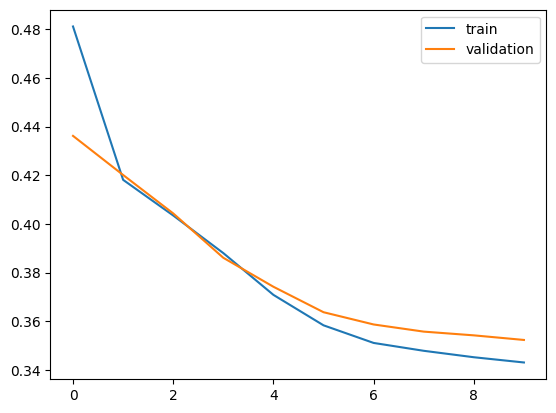

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

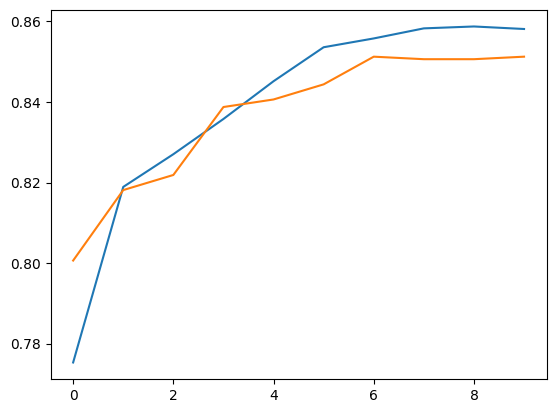

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])